## 02: Data Preparation

1. Here we construct our dataset for use in the experiment.

In [1]:
# import required libraries
import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import libs.utils as utils
import libs.bounding_box as bounding_box
import libs.patch_tools as patch_tools
import libs.data_prep as data_prep
import libs.train_test_split as tts
import libs.importing as importing
import libs.render as render
import libs.stats as stats
import libs.patch_tools as patch_tools
from importlib import reload


# set the random seed for we always get the same results (for now)
random.seed(42)


In [3]:
# GENERATE DATASET ID
exp_id = utils.short_id()
# use same data
exp_id = 'ef3b72ca'
print('ID: {}'.format(exp_id))

ID: ef3b72ca


In [4]:
# COPY DATA and SETUP EXPERIMENT
base_dir = '../source_dataset/all_v1'
data_prep.setup_experiment(base_dir, exp_id)

In [16]:
# 2-CLASS PROBLEM : Benign v. Papilloma

# SETUP : GET ALL CONTOURS
roi_df = pd.read_csv(os.path.join(exp_id, 'contours.csv'))
roi_2class = roi_df.copy()

# SELECT : only select dysplasia and carcinoma labeled contours
roi_2class = roi_2class[roi_2class.label.isin([3,4])].reset_index(drop=True)

# convert dysplasias to class 1 and carcinomas to class 2
roi_2class.loc[roi_2class['label'] == 3, 'label'] = 1
roi_2class.loc[roi_2class['label'] == 4, 'label'] = 2

train2bp_df, test2bp_df, val2bp_df = tts.train_test_validation_split(roi_2class, classes=[1,2], samples=2)

# SAVE : save the results
train2bp_df.to_csv(os.path.join(exp_id, 'contours_train.csv'), index=False)
test2bp_df.to_csv(os.path.join(exp_id, 'contours_test.csv'), index=False)
val2bp_df.to_csv(os.path.join(exp_id, 'contours_val.csv'), index=False)

n: 47
distribution: [1 2] [13 34]
classes: [1 2], samples_per_class: 2
train-n: 39
test-n: 4
val-n: 4


In [15]:
# OR IF we've already run this notebook before we can just load the data
train2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
test2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
val2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))

In [17]:
# LOG : show all the contours we dumped and those we are using
#       these are logged at: 
#       [dumped] ./exp_id/log/eleminated_contours
#       [kept]   ./exp_id/log/experiment_contours
data_prep.show_contours_for_experiment(exp_id, roi_df, roi_2class)

total contours: 97
eliminated contours: 50
kept contours: 47


image_id        id          name  label
0   hgv-44a1f2e3  3cde1351  3cde1351.csv      1
1   hgv-2d4a6a46  2a8db1fa  2a8db1fa.csv      2
2   hgv-2d4a6a46  76f536d8  76f536d8.csv      1
3   hgv-8528141b  a58c9552  a58c9552.csv      2
4   hgv-8528141b  0f887b7a  0f887b7a.csv      2
5   hgv-8528141b  54a3553b  54a3553b.csv      1
6   hgv-8528141b  4cb5eb92  4cb5eb92.csv      1
7   hgv-8528141b  9be9ecb7  9be9ecb7.csv      1
8   hgv-8528141b  96c7cdbf  96c7cdbf.csv      1
9   hgv-453fea32  12acd19b  12acd19b.csv      1
10  hgv-99fc12a1  b257c7ff  b257c7ff.csv      2
11  hgv-99fc12a1  145037c7  145037c7.csv      2
12  hgv-99fc12a1  51b064d6  51b064d6.csv      2
13  hgv-99fc12a1  93d2c382  93d2c382.csv      2
14  hgv-99fc12a1  2bde738d  2bde738d.csv      1
15  hgv-2cdb69f6  935831de  935831de.csv      2
16  hgv-2cdb69f6  182410a0  182410a0.csv      2
17  hgv-2cdb69f6  2b225cd3  2b225cd3.csv      2
18  hgv-de605528  edc49bcb  edc49bcb.csv      1
19  hgv-1cc11649  ff439444  ff439444.csv      1
20  hgv-1cc11649  cb636c4e  cb636c4e.csv      1
21  hgv-ff91c0a9  1642ec96  1642ec96.csv      2
22  hgv-ff91c0a9  b99d3094  b99d3094.csv      1
23  mdi-e3b0c312  d20913b2  d20913b2.csv      1
24  mdi-461bdebc  1a97162b  1a97162b.csv      1
25  mdi-945f5ac6  09c29991  09c29991.csv      1
26  mdi-f5cb6906  31058c3b  31058c3b.csv      1
27  mdi-df9a656f  a688c428  a688c428.csv      1
28  mdi-b731a91f  89d225d4  89d225d4.csv      1
29  mdi-5e3d3832  4963cf18  4963cf18.csv      1
30  mdi-f3f9ede5  f64de600  f64de600.csv      1
31  odi-963ee4be  ed29c1cd  ed29c1cd.csv      1
32  odi-1767f1a2  f92bbc3e  f92bbc3e.csv      1
33  odi-1767f1a2  ed6f6fc4  ed6f6fc4.csv      1
34  odi-7a9f9582  0ef94ef9  0ef94ef9.csv      1
35  odi-2511b830  481d2a42  481d2a42.csv      1
36  odi-423f2ec2  d3d5d3cb  d3d5d3cb.csv      1
37  odi-28084697  bc1de0a8  bc1de0a8.csv      1
38  odi-b43ee406  057317a5  057317a5.csv      1
39  odi-1480976d  c9405b0b  c9405b0b.csv      1
40  odi-a981441f  415e5e1d  415e5e1d.csv      2
41  odi-819f9608  0ab79a7b  0ab79a7b.csv      2
42  odi-ea593e69  1a234d1d  1a234d1d.csv      2
43  odi-bf734aed  fa157de2  fa157de2.csv      2
44  odi-bf734aed  ac6902ce  ac6902ce.csv      2
45  odi-bf734aed  05219377  05219377.csv      2
46  odi-bf734aed  d92db932  d92db932.csv      2
47  odi-bf734aed  a3bd3fb8  a3bd3fb8.csv      2
48  odi-897669a0  82ff0525  82ff0525.csv      2
49  odi-897669a0  711ca824  711ca824.csv      1

In [18]:
# TRAIN : data setup
#       : creates a directory ./exp_id/train/  where all the images and contours for training are stored
#       : creates a directory ./exp_id/train/log/info, where the contours and labels for the training set are stored as images for debugging purposes. 
train_df  = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
data_prep.setup_component(exp_id, train_df, 'train')
data_prep.log_component_info(os.path.join(exp_id, 'train'))

In [19]:
# TEST : data setup
#       : creates a directory ./exp_id/test/  where all the images and contours for test data are stored
#       : creates a directory ./exp_id/test/log/info, where the contours and labels for the test set are stored as images for debugging purposes.
test_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
data_prep.setup_component(exp_id, test_df, 'test')
data_prep.log_component_info(os.path.join(exp_id, 'test'))

In [20]:
# VALIDATION : data setup
#       : creates a directory ./exp_id/val/  where all the images and contours for validation data are stored
#       : creates a directory ./exp_id/val/log/info, where the contours and labels for the validation set are stored as images for debugging purposes.
val_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))
data_prep.setup_component(exp_id, val_df, 'val')
data_prep.log_component_info(os.path.join(exp_id, 'val'))

In [21]:
# GENERATE PATCHES : training data
#                    logs information to ./exp_id/train/log/setup_patches, where it shows patches on the image before and after removal

# threshold : the percentage a patch needs to overlap with the contour polygon in order to not be discarded
# patch_overlap : the shift size, should be a value which generates a factor of 64 for instance 0.5*64 = 32, or 0.25 * 64 = 16, etc.
train_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'train'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

# inspect the structure of our patches.csv file
display(train_patches_df.head())

# see how many training patches we have 
print('count: {}'.format(len(train_patches_df)))

image_id contour_id  patch_id    patch_name    x    y label_id
0  hgv-44a1f2e3   2dd43905  101f1800  101f1800.jpg  762  674        2
1  hgv-44a1f2e3   2dd43905  7b23d3a5  7b23d3a5.jpg  794  674        2
2  hgv-44a1f2e3   2dd43905  10ea2bc1  10ea2bc1.jpg  826  674        2
3  hgv-44a1f2e3   2dd43905  c366ac69  c366ac69.jpg  858  674        2
4  hgv-44a1f2e3   2dd43905  d8a80ad8  d8a80ad8.jpg  890  674        2

count: 2849


In [22]:
# GENERATE PATCHES : test data
#                    logs information to ./exp_id/test/log/setup_patches, where it shows patches on the image before and after removal
test_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'test'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(test_patches_df.head())
print('count: {}'.format(len(test_patches_df)))

image_id contour_id  patch_id    patch_name    x    y label_id
0  hgv-2cdb69f6   8206157b  d3515de2  d3515de2.jpg  738  168        1
1  hgv-2cdb69f6   8206157b  647dfd06  647dfd06.jpg  770  168        1
2  hgv-2cdb69f6   8206157b  d09c8b5b  d09c8b5b.jpg  802  168        1
3  hgv-2cdb69f6   8206157b  16e8796f  16e8796f.jpg  738  200        1
4  hgv-2cdb69f6   8206157b  72e17e91  72e17e91.jpg  770  200        1

count: 131


In [23]:
# GENERATE PATCHES : validation data
#                    logs information to ./exp_id/val/log/setup_patches, where it shows patches on the image before and after removal
val_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'val'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(val_patches_df.head())
print('count: {}'.format(len(val_patches_df)))

image_id contour_id  patch_id    patch_name    x    y label_id
0  mdi-e3b0c312   86a09485  4be2ab5b  4be2ab5b.jpg  761  265        2
1  mdi-e3b0c312   86a09485  80dbfc05  80dbfc05.jpg  793  265        2
2  mdi-e3b0c312   86a09485  4cadaa73  4cadaa73.jpg  729  297        2
3  mdi-e3b0c312   86a09485  a2213968  a2213968.jpg  761  297        2
4  mdi-e3b0c312   86a09485  777ea57f  777ea57f.jpg  793  297        2

count: 191


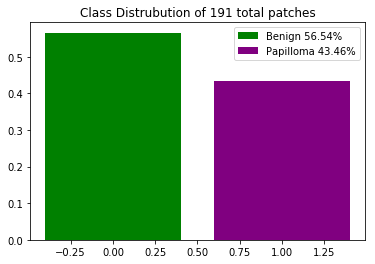

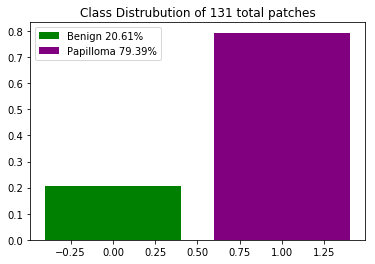

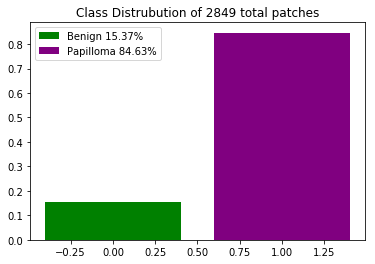

In [24]:
# BEFORE FILTERING PATCHES LOOK AT PATCH DISTRIBUTION
stats.plot_label_distribution(val_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(test_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(train_patches_df, labels=[1,2], label_key='label_id')

In [25]:
# FILTER PATCHES : some patches have way too much light or are just bad quality
#                  here we filter out patches which are so specular they contain very little information
#                  see: filtered patches are drawn onto the image at : ./exp_id/{train,test,val}/log/filter_highlight_patches - useful for debugging

train_dir = os.path.join(exp_id, 'train')
test_dir = os.path.join(exp_id, 'test')
val_dir = os.path.join(exp_id, 'val')

data_prep.filter_highlight_patches_for(train_dir, patch_size = 64, threshold=0.5)
data_prep.filter_highlight_patches_for(test_dir, patch_size = 64, threshold=0.5)
data_prep.filter_highlight_patches_for(val_dir, patch_size = 64, threshold=0.5)


bad patches: 50
before: 2849
cleaned: 2799
bad patches: 3
before: 131
cleaned: 128
bad patches: 0
before: 191
cleaned: 191


image_id contour_id  patch_id    patch_name    x    y  label_id
0    mdi-e3b0c312   86a09485  4be2ab5b  4be2ab5b.jpg  761  265         2
1    mdi-e3b0c312   86a09485  80dbfc05  80dbfc05.jpg  793  265         2
2    mdi-e3b0c312   86a09485  4cadaa73  4cadaa73.jpg  729  297         2
3    mdi-e3b0c312   86a09485  a2213968  a2213968.jpg  761  297         2
4    mdi-e3b0c312   86a09485  777ea57f  777ea57f.jpg  793  297         2
5    mdi-e3b0c312   86a09485  591b9fee  591b9fee.jpg  825  297         2
6    mdi-e3b0c312   86a09485  413b035e  413b035e.jpg  729  329         2
7    mdi-e3b0c312   86a09485  ca6ef9e0  ca6ef9e0.jpg  761  329         2
8    mdi-e3b0c312   86a09485  b99f2a95  b99f2a95.jpg  793  329         2
9    mdi-e3b0c312   86a09485  0008af2f  0008af2f.jpg  825  329         2
10   mdi-e3b0c312   86a09485  119438b5  119438b5.jpg  697  361         2
11   mdi-e3b0c312   86a09485  c8e134ae  c8e134ae.jpg  729  361         2
12   mdi-e3b0c312   86a09485  4adc5814  4adc5814.jpg  761  361         2
13   mdi-e3b0c312   86a09485  3eecbe2e  3eecbe2e.jpg  793  361         2
14   mdi-e3b0c312   86a09485  c1de4f26  c1de4f26.jpg  825  361         2
15   mdi-e3b0c312   86a09485  020c4253  020c4253.jpg  697  393         2
16   mdi-e3b0c312   86a09485  a022dd88  a022dd88.jpg  729  393         2
17   mdi-e3b0c312   86a09485  1baac08f  1baac08f.jpg  761  393         2
18   mdi-e3b0c312   86a09485  ba7d6b34  ba7d6b34.jpg  793  393         2
19   mdi-e3b0c312   86a09485  97c43dfe  97c43dfe.jpg  825  393         2
20   mdi-e3b0c312   86a09485  974af209  974af209.jpg  697  425         2
21   mdi-e3b0c312   86a09485  61cd4d29  61cd4d29.jpg  729  425         2
22   mdi-e3b0c312   86a09485  069b913d  069b913d.jpg  761  425         2
23   mdi-e3b0c312   86a09485  34406199  34406199.jpg  793  425         2
24   mdi-e3b0c312   86a09485  8301a154  8301a154.jpg  825  425         2
25   mdi-e3b0c312   86a09485  43bae0e0  43bae0e0.jpg  697  457         2
26   mdi-e3b0c312   86a09485  74a6ee9a  74a6ee9a.jpg  729  457         2
27   mdi-e3b0c312   86a09485  2aabf456  2aabf456.jpg  761  457         2
28   mdi-e3b0c312   86a09485  a9576824  a9576824.jpg  793  457         2
29   mdi-e3b0c312   86a09485  2dcab1e6  2dcab1e6.jpg  825  457         2
..            ...        ...       ...           ...  ...  ...       ...
161  odi-556875fe   0099267b  0d539e19  0d539e19.jpg  149  360         1
162  odi-556875fe   0099267b  222d2365  222d2365.jpg  181  360         1
163  odi-556875fe   0099267b  330cc759  330cc759.jpg  149  392         1
164  odi-556875fe   0099267b  78a04cc3  78a04cc3.jpg  181  392         1
165  odi-556875fe   0099267b  6547662d  6547662d.jpg  213  392         1
166  odi-556875fe   0099267b  d3bedb37  d3bedb37.jpg  149  424         1
167  odi-556875fe   0099267b  0702fead  0702fead.jpg  181  424         1
168  odi-556875fe   0099267b  9cbe9192  9cbe9192.jpg  213  424         1
169  odi-556875fe   0099267b  5c993ee2  5c993ee2.jpg  245  424         1
170  odi-556875fe   0099267b  6592b813  6592b813.jpg  149  456         1
171  odi-556875fe   0099267b  5ffec056  5ffec056.jpg  181  456         1
172  odi-556875fe   0099267b  a474e503  a474e503.jpg  213  456         1
173  odi-556875fe   0099267b  748a73b3  748a73b3.jpg  245  456         1
174  odi-556875fe   0099267b  c461d041  c461d041.jpg  149  488         1
175  odi-556875fe   0099267b  14200dca  14200dca.jpg  181  488         1
176  odi-556875fe   0099267b  1f919774  1f919774.jpg  213  488         1
177  odi-556875fe   0099267b  662eb035  662eb035.jpg  245  488         1
178  odi-556875fe   0099267b  79a65c2e  79a65c2e.jpg  117  520         1
179  odi-556875fe   0099267b  58a33bcd  58a33bcd.jpg  149  520         1
180  odi-556875fe   0099267b  1d23b654  1d23b654.jpg  181  520         1
181  odi-556875fe   0099267b  2218fc78  2218fc78.jpg  213  520         1
182  odi-556875fe   0099267b  ef0b25ff  ef0b25ff.jpg  245  520         1
183  odi-556875fe   0099267b  33c235e8  33c235e8.jpg  117  552     

In [26]:
## READ PATCHES : check to ensure we are ready to go to the next step
trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False)
testp_df = pd.read_csv(os.path.join(test_dir, 'patches_cleaned.csv'), index_col=False)
valp_df = pd.read_csv(os.path.join(val_dir, 'patches_cleaned.csv'), index_col=False)

train_pdr = importing.PatchDataReader(os.path.join(train_dir, 'patches'), trainp_df)
test_pdr = importing.PatchDataReader(os.path.join(test_dir, 'patches'), testp_df)
val_pdr = importing.PatchDataReader(os.path.join(val_dir, 'patches'), valp_df)

train_img, train_labels = train_pdr.read_data()
test_img, test_labels = test_pdr.read_data()
val_img, val_labels = val_pdr.read_data()

display('train images: {}'.format(len(train_img)))
display('train labels: {}'.format(len(train_labels)))
display('test images: {}'.format(len(test_img)))
display('test labels: {}'.format(len(test_labels)))
display('val images: {}'.format(len(val_labels)))
display('val labels: {}'.format(len(val_img)))


'train images: 2799'

'train labels: 2799'

'test images: 128'

'test labels: 128'

'val images: 191'

'val labels: 191'

In [27]:
# CREATE SHUFFLED DATA

## READ PATCHES : check to ensure we are ready to go to the next step
trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False)
testp_df = pd.read_csv(os.path.join(test_dir, 'patches_cleaned.csv'), index_col=False)
valp_df = pd.read_csv(os.path.join(val_dir, 'patches_cleaned.csv'), index_col=False)

idxs = data_prep.shuffle_indices(len(trainp_df))
shuffled_train_df = trainp_df.loc[idxs].reset_index(drop=True)
shuffled_train_df.to_csv(os.path.join(train_dir, 'patches_cleaned_shuffled.csv'), index=False)

idxs = data_prep.shuffle_indices(len(testp_df))
shuffled_test_df = testp_df.loc[idxs].reset_index(drop=True)
shuffled_test_df.to_csv(os.path.join(test_dir, 'patches_cleaned_shuffled.csv'), index=False)

idxs = data_prep.shuffle_indices(len(valp_df))
shuffled_val_df = valp_df.loc[idxs].reset_index(drop=True)
shuffled_val_df.to_csv(os.path.join(val_dir, 'patches_cleaned_shuffled.csv'), index=False)



In [28]:
## Visualize the patches
data_prep.log_patch_data_reader(train_dir, train_pdr)
data_prep.log_patch_data_reader(test_dir, test_pdr)
data_prep.log_patch_data_reader(val_dir, val_pdr)